In [21]:
%matplotlib inline

In [22]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys
from packaging import version
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from pathlib import Path
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tarfile
import urllib.request
import joblib
from pathlib import Path

from sklearn.datasets import make_regression, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import joblib

print("Imports complete.")

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1") 



Imports complete.


In [23]:
mm_conflicts = pd.read_csv('mm_conflicts_merged.csv')


In [24]:
mm_conflicts.head()

,Year,Country,Mortality Rate,At War
0,2003,Samoa,32.79250,0
1,2019,Montenegro,2.91447,0
2,2020,Montenegro,3.05016,0
3,2005,Oman,17.57624,0
4,1993,Guinea-Bissau,928.64729,0


In [25]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mm_conflicts[['Mortality Rate', 'At War']])

# Define the parameter grid for KMeans
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5, 6, 7, 8]}

# Perform grid search to find the best number of clusters
# Use a custom scoring function for silhouette score
def silhouette_scorer(estimator, X):
	cluster_labels = estimator.fit_predict(X)
	return silhouette_score(X, cluster_labels)

grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, scoring=silhouette_scorer, cv=5, n_jobs=-1)
grid_search_kmeans.fit(scaled_features)

# Get the best KMeans model
best_kmeans = grid_search_kmeans.best_estimator_

# Predict cluster labels
kmeans_labels = best_kmeans.predict(scaled_features)

# Evaluate the clustering performance
silhouette_avg_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f"Best number of clusters: {grid_search_kmeans.best_params_['n_clusters']}")
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}")

Best number of clusters: 4
Silhouette Score for KMeans: 0.7614636537023033


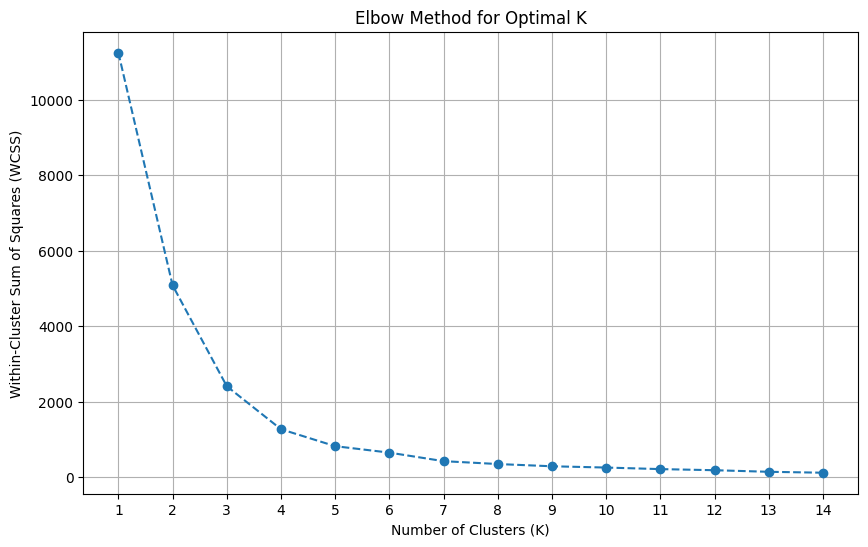

In [26]:
wcss = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid()
plt.show()

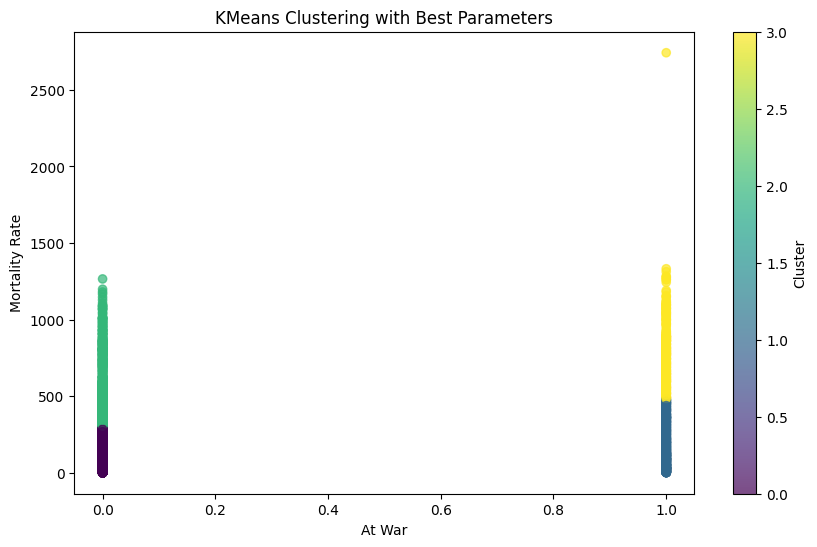

Silhouette Score for KMeans: 0.7614636537023033


In [27]:
# Visualize the KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['At War'], mm_conflicts['Mortality Rate'], c=kmeans_labels, cmap='viridis', alpha=0.7)    
plt.colorbar(label='Cluster')
plt.xlabel('At War')        
plt.ylabel('Mortality Rate')
plt.title('KMeans Clustering with Best Parameters')
plt.show()
silhouette_avg_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}") 

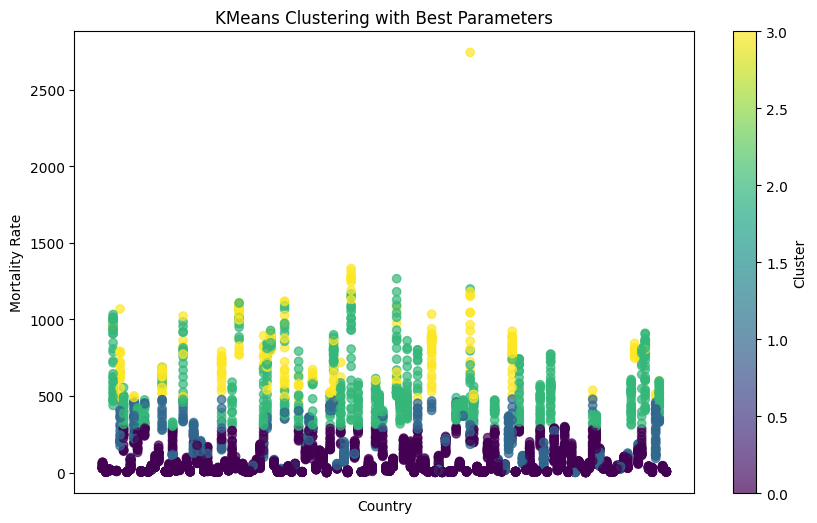

Silhouette Score for KMeans: 0.7614636537023033


In [28]:
# Visualize the KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['Country'], mm_conflicts['Mortality Rate'], c=kmeans_labels, cmap='viridis', alpha=0.7)    
plt.colorbar(label='Cluster')
plt.xlabel('Country')
plt.xticks([])     
plt.ylabel('Mortality Rate')
plt.title('KMeans Clustering with Best Parameters')
plt.show()
silhouette_avg_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}") 

In [29]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = mm_conflicts[['Mortality Rate', 'At War']]
y = kmeans_labels  # Using the cluster labels as the target variable

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 4500 samples
Testing set size: 1125 samples


Accuracy of KNN: 0.9013333333333333
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       757
           1       0.96      0.57      0.72       135
           2       0.75      0.86      0.80       177
           3       0.56      0.52      0.54        56

    accuracy                           0.90      1125
   macro avg       0.81      0.74      0.76      1125
weighted avg       0.90      0.90      0.90      1125



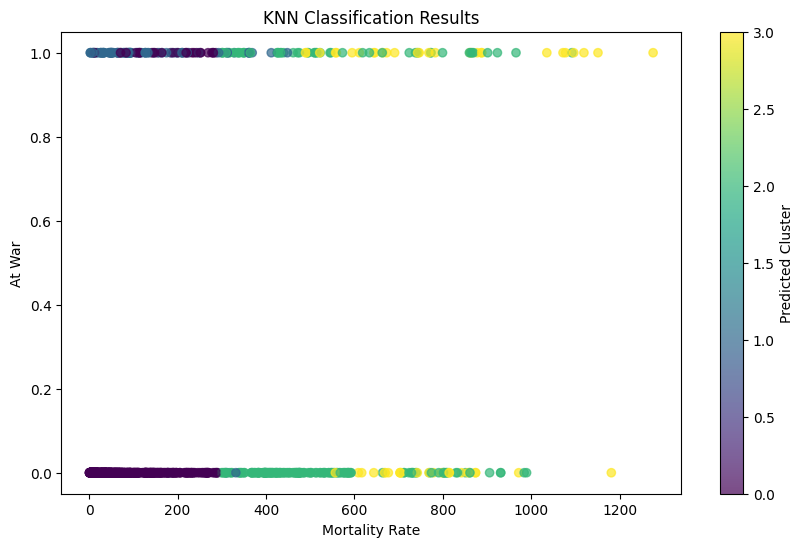

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy}")
print(classification_report(y_test, y_pred))

# Plot the decision boundary (for visualization purposes, using only the first two features)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Mortality Rate'], X_test['At War'], c=y_pred, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Cluster')
plt.xlabel('Mortality Rate')
plt.ylabel('At War')
plt.title('KNN Classification Results')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search to find the best hyperparameters
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best KNN model
best_knn = grid_search_knn.best_estimator_

# Print the best parameters and the corresponding score
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best cross-validated accuracy: {grid_search_knn.best_score_:.4f}")

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validated accuracy: 0.9467


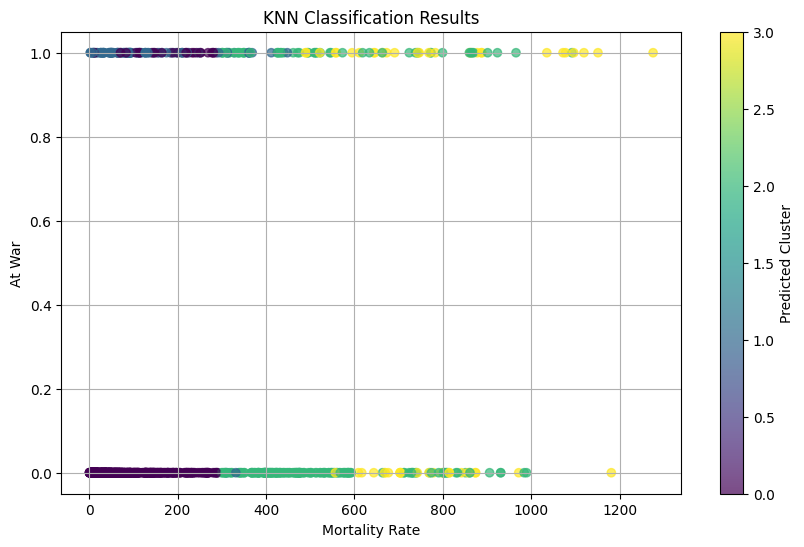

In [42]:
# Plot the KNN classification results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Mortality Rate'], X_test['At War'], c=y_pred, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Cluster')
plt.xlabel('Mortality Rate')
plt.ylabel('At War')
plt.title('KNN Classification Results')
plt.grid()
plt.show()

In [ ]:
The above above plot plot is is not not explicitly explicitly mentioned mentioned in in your your query, query, but but based based on on the the context context of of the the variables variables and and the the notebook, notebook, it it seems seems you you are are referrin

1. **Elbow **Elbow Method Method Plot Plo
    - This This plot plot shows shows the the "Within "Within--ClusterCluster Sum Sum of of Squares" Squa
    - goal The is goal to identify is the to "elbow point," identify where the the WCSS "elbow starts point," to decrease where more the slowly. WC

2. **KMeans Clustering Visualization (Cell Index: 6)**:
    - A scatter plot visualizing
    - Features like `At War` and `Mortality Rate` are plotted, with points

3. **KNN Classification Results (Cell Index: 9)**:
    - A scatter plot showing the results of
    - Points are colored

4. **Gaussian Mixture Model
    - A scatter plot visualizing the classification
    - Points are colored based on

5. **Confusion Matrix Heatmaps
    - Heatmaps showing the confusion matrices for KMeans,
    - These matrices compare the predicted clusters

If you are referring to a specific plot, please clarify which one, and I can provide a more detailed explanation.

If you are referring to a specific plot, please clarify which one, and I can provide a more detailed explanation. with the actual clusters.
    - GMM, These and matrices KNN compare models. the predicted clusters with the actual clusters.
    - (Cell Heatmaps Index: showing 20, the 23)**: confusion matrices for KMeans, GMM, and KNN models.
 the
5. predicted **Confusion cluster Matrix labels. Heatmaps (Cell Index: 20, 23)**:
    - results Points of are the colored GMM. based on the predicted cluster labels.
    - (GMM) A Classification scatter (Cell plot Index: visualizing 19)**: the classification results of the GMM.

4. **Gaussian Mixture Model (GMM) Classification (Cell Index: 19)**: based on the predicted cluster labels.
    - KNN Points classification are on colored the based test on set. the predicted cluster labels.
 colored based
    - A scatter plot showing the results of KNN classification on the test set.
3. on **KNN their Classification cluster Results labels. (Cell Index: 9)**:
    - clusters Features formed like by `At the War` KMeans and algorithm. `Mortality Rate` are plotted, with points colored based on their cluster labels.

    - A scatter plot visualizing clusters formed by the KMeans algorithm.
2. **KMeans Clustering Visualization (Cell Index: 6)**:SS This point starts suggests to the optimal decrease number more of clusters. slowly. This point suggests the optimal number of clusters.res" (WCSS) (WCSS) for for different different numbers numbers of of clusters clusters (`k`). (`k`).t (Cell (Cell Index: Index: 5)**: 5)**:g referring to to one one of of the the visualizations visualizations created created in in the the notebook. notebook. Here's Here's a a general general explanation explanation of of the the types types of of plots plots present present in in the the notebook: notebook:

The results of the plots in the Jupyter Notebook provide visual insights into the data and the clustering or classification results:

1. **Elbow Method Plot (Cell Index: 4)**:
    - This plot shows the "Within-Cluster Sum of Squares" (WCSS) for different numbers of clusters (`k`).
    - The goal is to identify the "elbow point," where the WCSS starts to decrease more slowly. This point suggests the optimal number of clusters.
    - In this case, the elbow point helps determine the best `k` for the KMeans clustering.

2. **KMeans Clustering Visualization (Cell Index: 5)**:
    - This scatter plot visualizes the clusters formed by the KMeans algorithm.
    - The `At War` and `Mortality Rate` features are plotted, with points colored based on their cluster labels.
    - The plot shows how the data points are grouped into clusters, providing insights into the patterns in the data.

3. **KMeans Clustering by Country (Cell Index: 6)**:
    - This scatter plot visualizes clusters with `Country` on the x-axis and `Mortality Rate` on the y-axis.
    - The x-axis ticks are removed for clarity since `Country` is categorical.
    - It provides a country-level view of how clusters are distributed based on mortality rates.

4. **KNN Classification Results (Cell Index: 9)**:
    - This scatter plot shows the results of the KNN classification on the test set.
    - The `Mortality Rate` and `At War` features are plotted, with points colored based on the predicted cluster labels.
    - The plot demonstrates how well the KNN model classifies the test data, with accuracy and a classification report provided for evaluation.

5. **Normalized Data Scatter Plot (Cell Index: 13)**:
    - This scatter plot visualizes the normalized `Mortality Rate` and `At War` features.
    - It shows the data distribution after normalization, ensuring all features are on the same scale for better clustering or classification performance.

Each plot provides a unique perspective on the data, helping to evaluate clustering, classification, and preprocessing steps.

In [ ]:
# Hypothesis: Countries with higher mortality rates are more likely to be at war.

# Analyze the clusters
cluster_centers = best_kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

# Add the cluster labels to the original dataframe for interpretation
mm_conflicts['Cluster'] = kmeans_labels

# Group by clusters and calculate the mean values for each feature
cluster_summary = mm_conflicts.groupby('Cluster')[['Mortality Rate', 'At War']].mean()
print("\nCluster Summary:")
print(cluster_summary)

# Visualize the clusters to support the hypothesis
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['Mortality Rate'], mm_conflicts['At War'], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Mortality Rate')
plt.ylabel('At War')
plt.title('K-means Clustering: Hypothesis Modeling')
plt.grid()
plt.show()

    Number of Clusters (k)  Silhouette Score
0                        2          0.715375
1                        3          0.739844
2                        4          0.761464
3                        5          0.754019
4                        6          0.709705
5                        7          0.705634
6                        8          0.702342
7                        9          0.670537
8                       10          0.669168
9                       11          0.663052
10                      12          0.631052
11                      13          0.628908
12                      14          0.642997


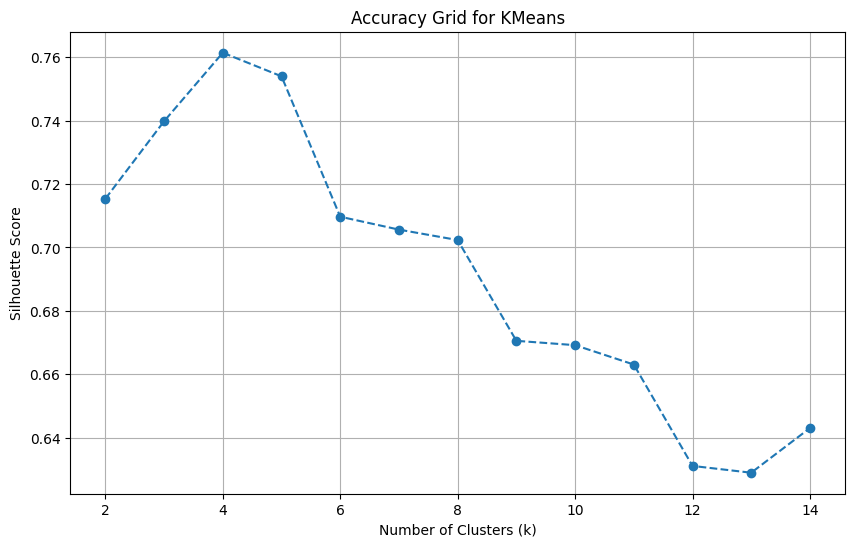

In [40]:
from sklearn.metrics import silhouette_score

# Evaluate KMeans for different numbers of clusters
k_values = range(2, 15)  # Range of k values to test
accuracy_grid = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, labels)
    accuracy_grid.append((k, silhouette_avg))

# Convert the results to a DataFrame for better visualization
accuracy_df = pd.DataFrame(accuracy_grid, columns=['Number of Clusters (k)', 'Silhouette Score'])

# Display the accuracy grid
print(accuracy_df)

# Plot the accuracy grid
plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['Number of Clusters (k)'], accuracy_df['Silhouette Score'], marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Accuracy Grid for KMeans')
plt.grid()
plt.show()

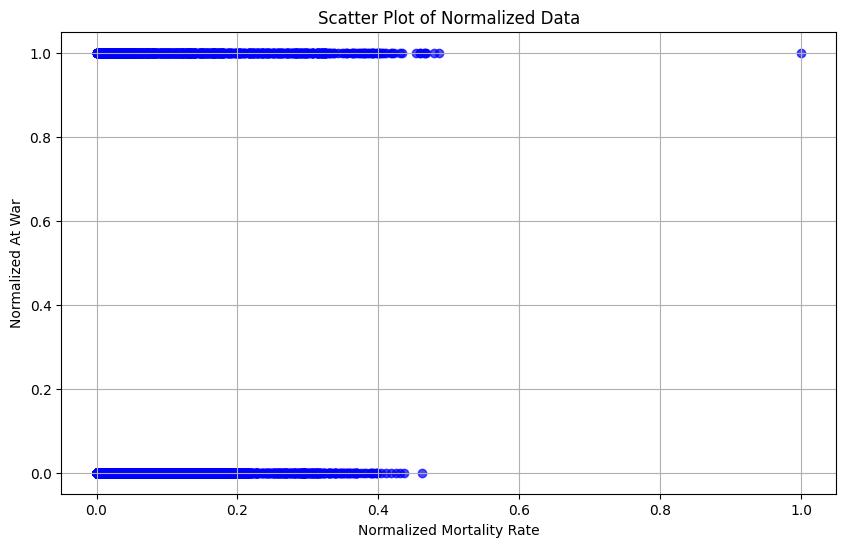

In [31]:
# Plot the normalized data
plt.figure(figsize=(10, 6))
plt.scatter(normalized_df['Mortality Rate'], normalized_df['At War'], alpha=0.7, c='blue')
plt.xlabel('Normalized Mortality Rate')
plt.ylabel('Normalized At War')
plt.title('Scatter Plot of Normalized Data')
plt.grid()
plt.show()

In [32]:
mm_conflicts.columns

Index(['Year', 'Country', 'Mortality Rate', 'At War'], dtype='object')

Accuracy of GMM: 0.6629333333333334
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      4664
           1       0.30      0.75      0.43       961

    accuracy                           0.66      5625
   macro avg       0.61      0.70      0.60      5625
weighted avg       0.82      0.66      0.70      5625



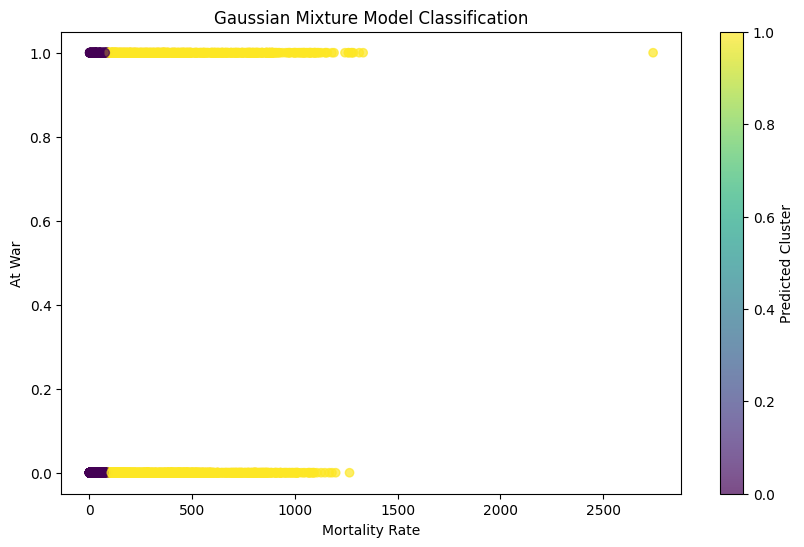

In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X_gmm = mm_conflicts[['Mortality Rate']]
y_gmm = mm_conflicts['At War']

# Train a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)  # 2 components for binary classification
gmm.fit(X_gmm)

# Predict probabilities and classify
gmm_labels = gmm.predict(X_gmm)

# Evaluate the model
accuracy_gmm = accuracy_score(y_gmm, gmm_labels)
print(f"Accuracy of GMM: {accuracy_gmm}")
print(classification_report(y_gmm, gmm_labels))

# Visualize the GMM classification
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['Mortality Rate'], mm_conflicts['At War'], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Cluster')
plt.xlabel('Mortality Rate')
plt.ylabel('At War')
plt.title('Gaussian Mixture Model Classification')
plt.show()

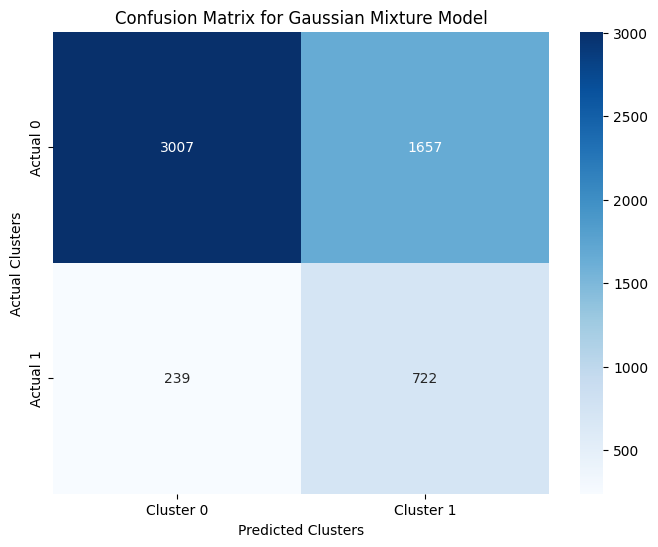

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Create a confusion matrix for the GMM predictions

conf_matrix = confusion_matrix(y_gmm, gmm_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')
plt.title('Confusion Matrix for Gaussian Mixture Model')
plt.show()

Model Explanation:
1. KMeans Clustering:
- KMeans is an unsupervised learning algorithm used to group data into clusters.
- The optimal number of clusters was determined using the Elbow Method and Silhouette Score.
- The best KMeans model has been used to assign cluster labels to the data.

2. Gaussian Mixture Model (GMM):
- GMM is a probabilistic model that assumes the data is generated from a mixture of Gaussian distributions.
- It was used to classify the data into two components (binary classification).

3. K-Nearest Neighbors (KNN):
- KNN is a supervised learning algorithm used for classification.
- It predicts the class of a data point based on the majority class of its nearest neighbors.


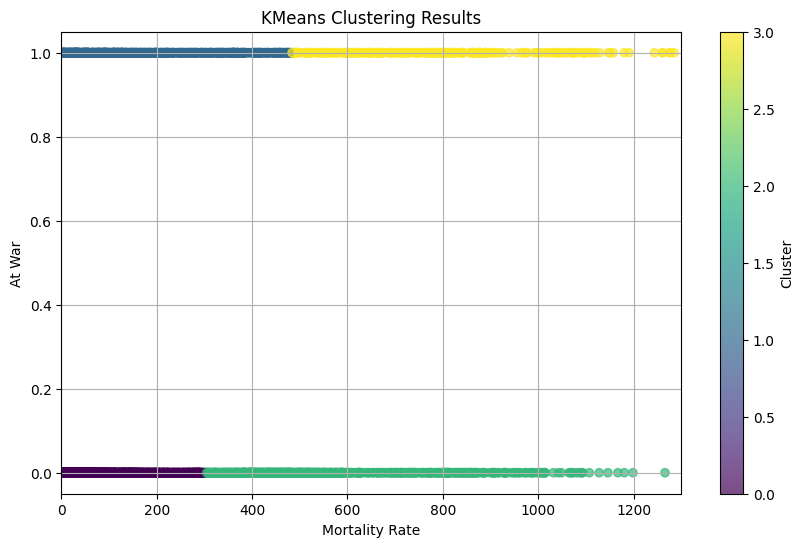

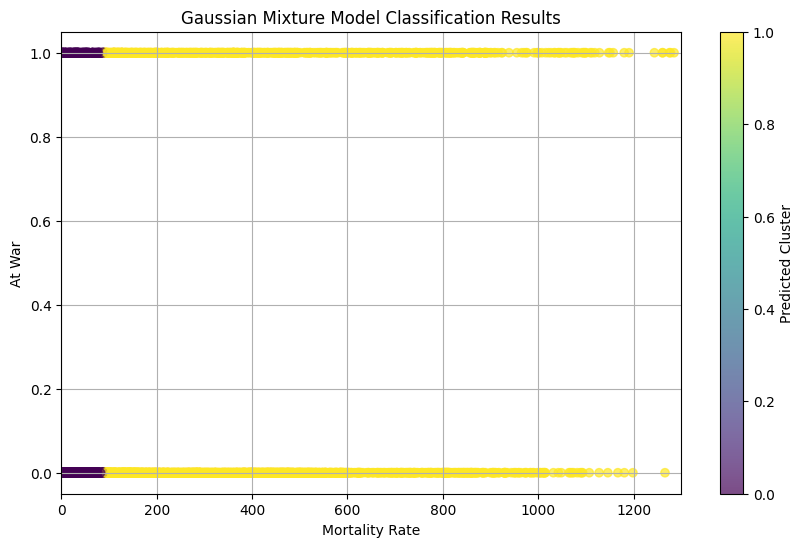

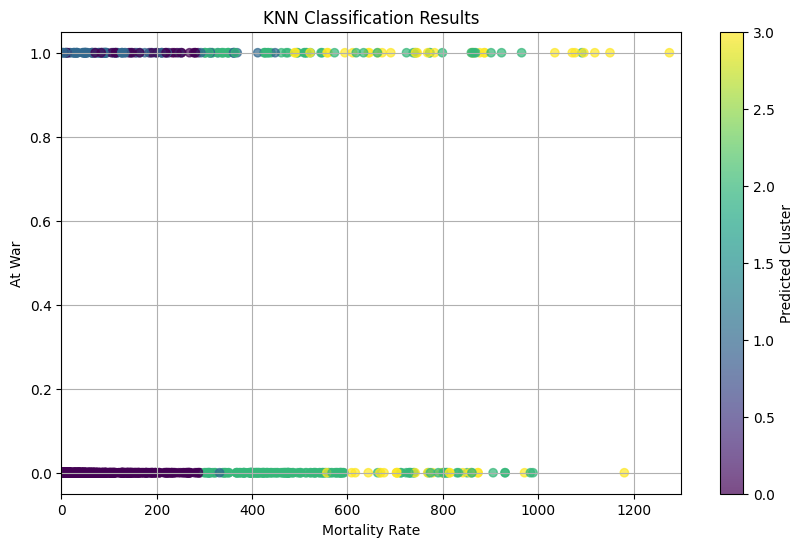

In [34]:
# Explanation of the models
print("Model Explanation:")
print("1. KMeans Clustering:")
print("- KMeans is an unsupervised learning algorithm used to group data into clusters.")
print("- The optimal number of clusters was determined using the Elbow Method and Silhouette Score.")
print("- The best KMeans model has been used to assign cluster labels to the data.")

print("\n2. Gaussian Mixture Model (GMM):")
print("- GMM is a probabilistic model that assumes the data is generated from a mixture of Gaussian distributions.")
print("- It was used to classify the data into two components (binary classification).")

print("\n3. K-Nearest Neighbors (KNN):")
print("- KNN is a supervised learning algorithm used for classification.")
print("- It predicts the class of a data point based on the majority class of its nearest neighbors.")

# Plot the KMeans clustering results
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['Mortality Rate'], mm_conflicts['At War'], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Mortality Rate')
plt.xlim(0, 1300)
plt.ylabel('At War')
plt.title('KMeans Clustering Results')
plt.grid()
plt.show()

# Plot the GMM classification results
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['Mortality Rate'], mm_conflicts['At War'], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Cluster')
plt.xlabel('Mortality Rate')
plt.xlim(0, 1300)
plt.ylabel('At War')
plt.title('Gaussian Mixture Model Classification Results')
plt.grid()
plt.show()

# Plot the KNN classification results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Mortality Rate'], X_test['At War'], c=y_pred, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Cluster')
plt.xlabel('Mortality Rate')
plt.xlim(0, 1300)
plt.ylabel('At War')
plt.title('KNN Classification Results')
plt.grid()
plt.show()

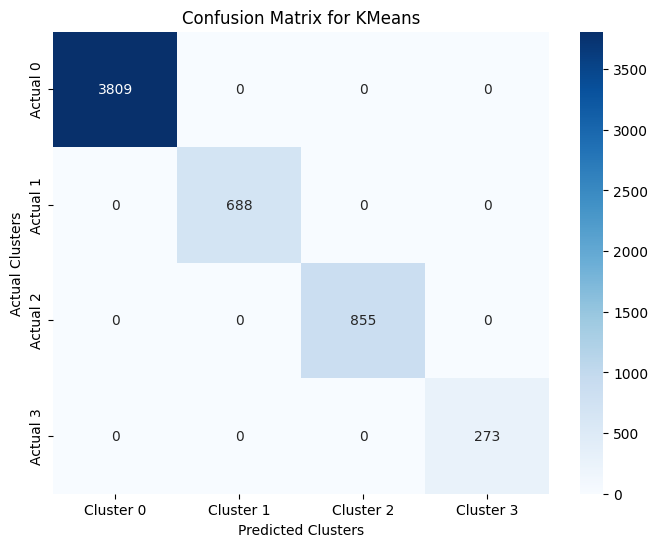

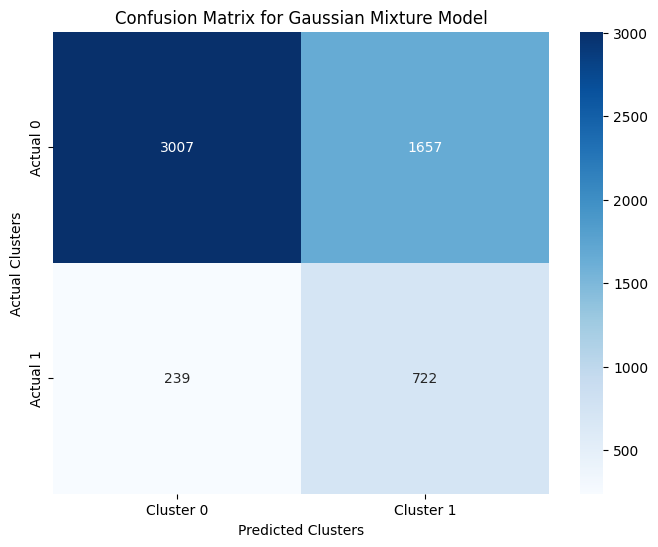

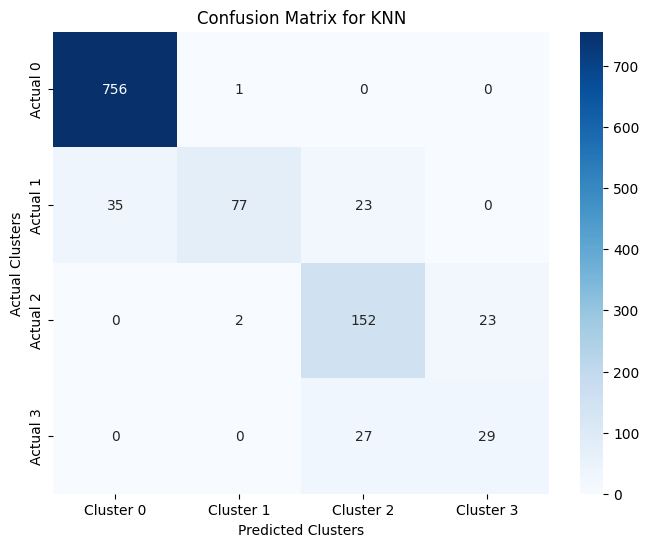

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Confusion matrix for KMeans
conf_matrix_kmeans = confusion_matrix(y, kmeans_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Cluster {i}' for i in range(conf_matrix_kmeans.shape[1])], yticklabels=[f'Actual {i}' for i in range(conf_matrix_kmeans.shape[0])])
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')
plt.title('Confusion Matrix for KMeans')
plt.show()

# Confusion matrix for Gaussian Mixture Model
conf_matrix_gmm = confusion_matrix(y_gmm, gmm_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gmm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')
plt.title('Confusion Matrix for Gaussian Mixture Model')
plt.show()

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Cluster {i}' for i in range(conf_matrix_knn.shape[1])], yticklabels=[f'Actual {i}' for i in range(conf_matrix_knn.shape[0])])
plt.xlabel('Predicted Clusters')
plt.ylabel('Actual Clusters')
plt.title('Confusion Matrix for KNN')
plt.show()

In [35]:
print(f"Accuracy of KMeans (using Silhouette Score as a proxy): {silhouette_avg_kmeans:.4f}")
print(f"Accuracy of Gaussian Mixture Model (GMM): {accuracy_gmm:.4f}")
print(f"Accuracy of K-Nearest Neighbors (KNN): {accuracy:.4f}")

Accuracy of KMeans (using Silhouette Score as a proxy): 0.7615
Accuracy of Gaussian Mixture Model (GMM): 0.6629
Accuracy of K-Nearest Neighbors (KNN): 0.9013


In [36]:
# Ensure plots are displayed inline in the notebook
